<a href="https://colab.research.google.com/github/aruanalucena/Projeto-Cursos/blob/master/Turn_Over_modelo_com_estrat%C3%A9gia_de_reten%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/mbdq8P5.png)

#<font color='arrow'>**TURN OVER Modelo com estratégia de retenção de funcionários : Estudo de caso de RH analytics**

# <font color='blue'>INDICE
* Definição do Problema



* Representam dados fictícios/falsificados sobre cancelamentos. Para cada 10 anos ele mostra os funcionários que estão ativos e aqueles que terminaram.

* A intenção é ver se as rescisões individuais podem ser previstas a partir dos dados fornecidos.

> O que deve ser previsto é o status de ativo ou rescindido.

>Conteúdo
> Os dados contêm

>1. identificação do funcionário
>1.data de registro do funcionário ( ano dos dados)
>1.data de nascimento
>1.data de contratação
>1.data de término
>1.idade
>1.tempo de serviço
>1.cidade
>1.departamento
>1.cargo
>1.número da loja
>1.gênero
>1.motivo da rescisão
>1.tipo de rescisão
>1.ano de status
>1.status
>1.unidade de negócios


>* A rotatividade de funcionários  é um problema dispendioso para as empresas. O verdadeiro custo da substituição de um funcionário
pode muitas vezes ser bastante grande. Um estudo realizado pela constatação de que as empresas normalmente pagam cerca de um quinto do salário de um funcionário para substituir esse funcionário, e o custo pode aumentar significativamente se os executivos ou funcionários mais bem pagos forem substituídos. 
>* Em outras palavras, o custo de substituição de empregados para a maioria dos empregadores continua sendo significativo. Isto se deve ao tempo gasto para entrevistar e encontrar um substituto, aos bônus de admissão e à perda de produtividade por vários meses enquanto o novo funcionário se acostuma com a nova função.

>* Algoritmos de aprendizagem de máquinas freqüentemente mostram exemplos de rotatividade de clientes para telcos ou marketing de produtos. Esses algoritmos se aplicam igualmente à rotatividade de funcionários.



#<font color='arrow'>Visão geral do projeto
 
> * A rotatividade dos funcionários é um problema dispendioso para as empresas. O verdadeiro custo de substituição de um funcionário pode ser muitas vezes bastante grande. Um estudo do Center for American Progress descobriu que as empresas normalmente pagam cerca de um quinto do salário de um funcionário para substituir esse funcionário, e o custo pode aumentar significativamente se os executivos ou funcionários mais bem pagos forem substituídos. 
>* Em outras palavras, o custo de substituição de empregados para a maioria dos empregadores continua sendo significativo. Isto se deve ao tempo gasto para entrevistar e encontrar um substituto, aos bônus de admissão e à perda de produtividade por vários meses enquanto o novo funcionário se acostuma com a nova função.


#<font color='arrow'> Problemas dificuldades
> * Entender por que e quando os funcionários estão mais propensos a sair pode levar a ações para melhorar a retenção de funcionários, assim como possivelmente planejar novas contratações com antecedência. 
> * Tentarei  uma abordagem sistemática passo a passo usando um método que poderia ser usado para uma variedade de problemas de ML. Este projeto se enquadraria no que é comumente conhecido como "Análise de RH"

Neste projeto, vamos tentar responder o seguinte problema

*  Qual é a probabilidade de um funcionário ativo deixar a empresa?
* Quais são os indicadores-chave de um empregado que deixa a empresa?
* Que políticas ou estratégias podem ser adotadas com base nos resultados para melhorar a retenção de funcionários? 

Dado que temos dados sobre ex-empregados, este é um problema de classificação supervisionado binario,  
(empregado ativo)= 1 
(ex-empregado).
 Neste estudo, nossa variável alvo(target) Y é a probabilidade de um funcionário deixar a empresa.

![Imgur](https://i.imgur.com/62WBQa6.jpg)

# Analise do Dataset
Neste estudo de caso, um conjunto de dados de Employee Attrition (Kaggle)People HR Analytics Repository, que contém dados de funcionários para 49.656 funcionários com 18 váriaveis  sobre os funcionários. Vou utilizar este conjunto de dados para prever quando os funcionários vão demitir-se, entendendo os principais fatores de rotatividade dos funcionários.



# Importando as Bibliotecas

###  Manipulação e Análise de Dados

In [12]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Visualização dos Dados

In [59]:
!pip install plotly

In [60]:
pip install chart-studio

In [61]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
#Padrão
#from plotly import plotly as py
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) 
#este código, permite-nos trabalhar com a versão  offline
 #Usando plotly +  modo offline
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

In [62]:
# sklearn modulos para pré processamento
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  
# SMOTE
# sklearn modulo para  ML model selection
# import 'train_test_split'
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Biblioteca para modelar os dados
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [63]:

import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
# ip = get_ipython()
# ip.register_magics(jupyternotify.JupyterNotifyMagics)


# Importando os Dados

In [64]:
df_sourcefile = pd.read_csv('/content/MFG10YearTerminationData.csv')
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (49653, 18)


In [65]:
# Fazer uma cópia do arquivo fonte original
df_HR = df_sourcefile.copy()


###Descrição dos dados e visualizações exploratórias

Nesta seção, forneceremos visualizações de dados que resumem ou extraem características relevantes de características em nosso conjunto de dados. Vamos analisar cada coluna em detalhes, obter uma melhor compreensão do conjunto de dados e agrupá-los quando apropriado.

### Visão Geral

In [66]:
# Verificando as colunas do DataFrame
df_HR.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [67]:
# Primeira analisada no conjunto de dados
df_HR.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [68]:
# Final do conjunto de dados
df_HR.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


### O conjunto de dados contém várias colunas numéricas e categóricas que fornecem várias informações sobre os detalhes pessoais e de emprego do funcionário

In [69]:
# Vamos organizar as colunas por seu tipo (ou seja, int64, float64, objeto)
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{int64: ['EmployeeID', 'age', 'length_of_service', 'store_name', 'STATUS_YEAR'], object: ['recorddate_key', 'birthdate_key', 'orighiredate_key', 'terminationdate_key', 'city_name', 'department_name', 'job_title', 'gender_short', 'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS', 'BUSINESS_UNIT']}

In [70]:
# Colunas e valores faltantes
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

### Os dados fornecidos não têm valores em falta. Na HR Analytics, é pouco provável que os dados dos funcionários apresentem uma grande proporção de valores em falta, já que os departamentos de RH normalmente têm todos os dados pessoais e de emprego arquivados. 

### Visão geral das características numéricas

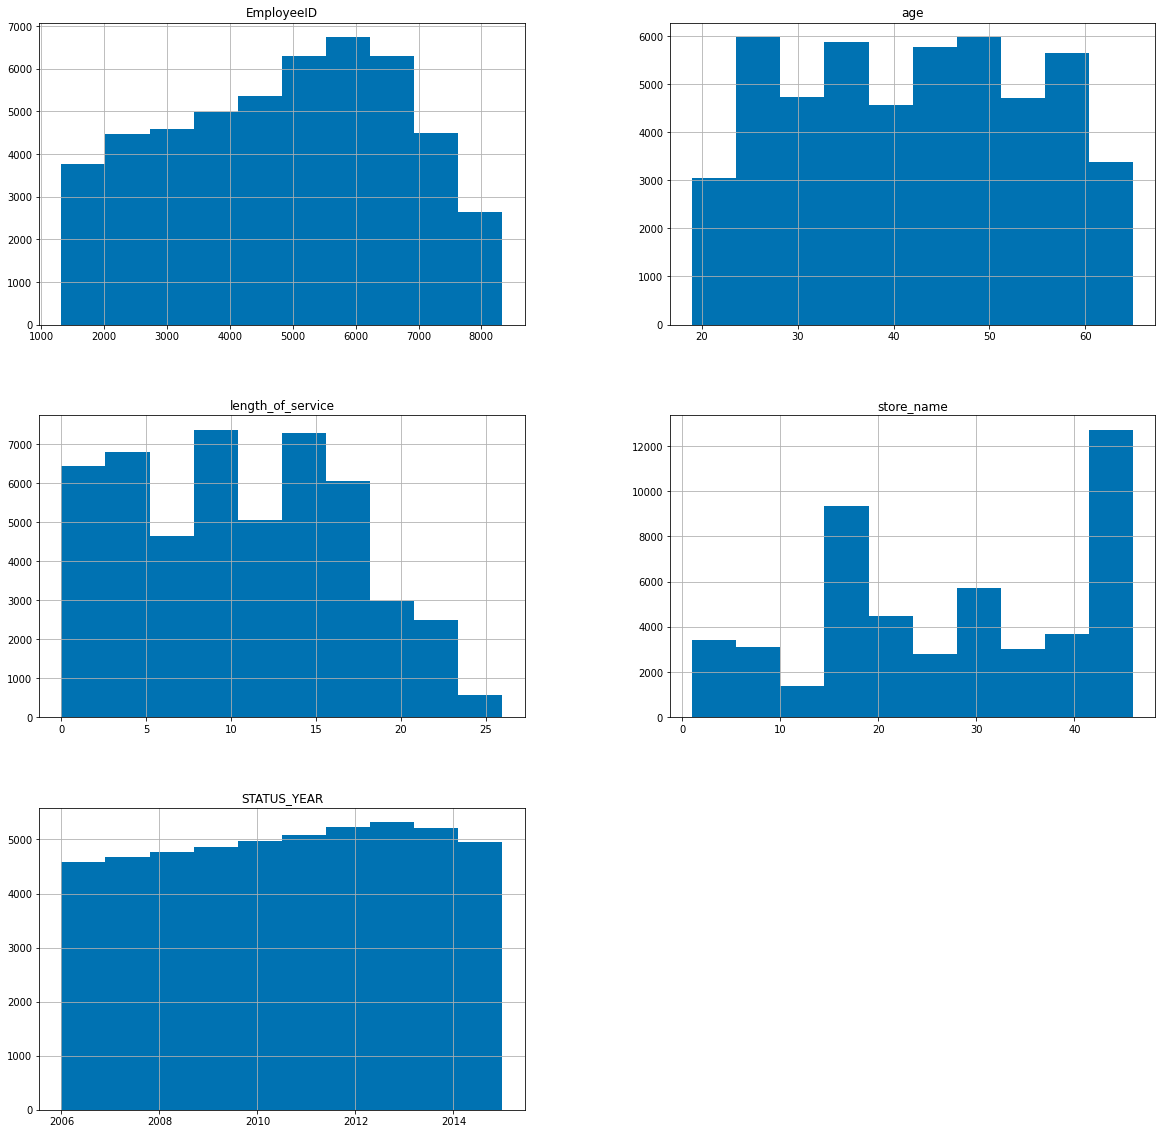

In [71]:
df_HR.hist(figsize=(20,20))
plt.show()

### Algumas observações podem ser feitas com base nas informações e histogramas de características numéricas:
###  Os métodos de transformação de dados podem ser necessários para abordar uma distribuição normal antes de ajustar um modelo aos dados.
* O histograma com uma caracteristicas de normal são (EmployeeID)(STATUS_YEAR)

* A variavel ( 'length_of_service) (store_name) não tem a curva parecida com uma normal. 

### Distribuição das características por atributo de destino
## AGE

In [72]:
(mu, sigma) = norm.fit(df_HR.loc[df_HR['STATUS'] == 'ACTIVE', 'age'])
print(
    'Ex-Funcionario: Idade Média  = {:.1f} Idade e Desvio Padrão = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df_HR.loc[df_HR['STATUS'] == 'TERMINATED', 'age'])
print(
    'Funcionario : Idade media  = {:.1f}Idade e Desvio Padrão  = {:.1f}'.format(mu, sigma))

Ex-Funcionario: Idade Média  = 41.8 Idade e Desvio Padrão = 12.2
Funcionario : Idade media  = 51.5Idade e Desvio Padrão  = 16.5


### Vamos criar um gráfico de estimativa da densidade do núcleo (KDE) colorido pelo valor do alvo. Uma estimativa da densidade do núcleo (KDE) é uma forma não paramétrica de estimar a função de densidade de probabilidade de uma variável aleatória. Ela nos permitirá identificar se existe uma correlação entre a idade do cliente e sua capacidade de pagá-la de volta.

In [73]:
# Education Field of employees
df_HR['STATUS_YEAR'].value_counts()

2013    5320
2012    5231
2014    5215
2011    5082
2010    4963
2015    4961
2009    4852
2008    4767
2007    4683
2006    4579
Name: STATUS_YEAR, dtype: int64

In [77]:
df_Status_Year = pd.DataFrame(columns=["STATUS", "% of Leavers"])
i=0
for field in list(df_HR['STATUS_YEAR'].unique()):
    ratio = df_HR[(df_HR['STATUS_YEAR']==field)&(df_HR['STATUS']=="ACTIVE")].shape[0] / df_HR[df_HR['STATUS_YEAR']==field].shape[0]
    df_Status_Year.loc[i] = (field, ratio*100)
    i += 1
print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_EF = df_Status_Year.groupby(by="STATUS").sum()
df_EF.iplot(kind='bar',title='Leavers by Education Field (%)')

In 2015, the ratio of leavers is 96.73%


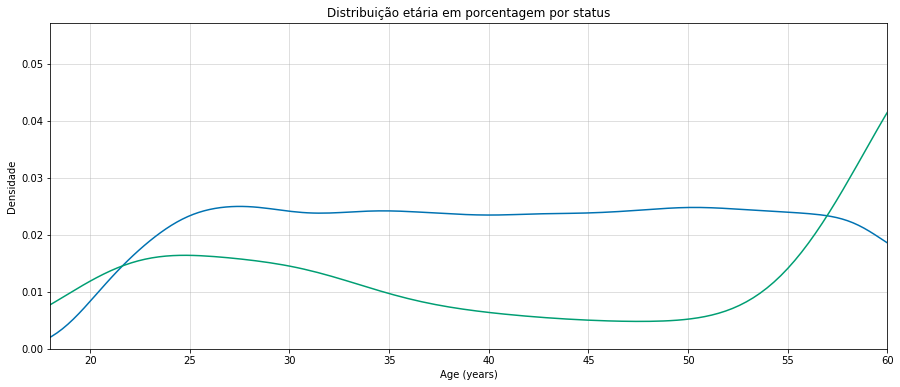

In [44]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['STATUS'] ==  'ACTIVE', 'age' ],  label = 'Empregado')
sns.kdeplot(df_HR.loc[df_HR['STATUS'] == 'TERMINATED', 'age'], label = 'Ex-Empregado')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Densidade')
plt.title('Distribuição etária em porcentagem por status');
plt.show()

### Genero

In [45]:
# Genero dos funcionarios
df_HR['gender_full'].value_counts()

Female    25898
Male      23755
Name: gender_full, dtype: int64

In [46]:
print("Distribuição de gênero normalizada de ex-empregados no conjunto de dados: Homem = {:.1f}%; Feminino {:.1f}%.".format((df_HR[(df_HR['STATUS'] == 'ACTIVE') & (
    df_HR['gender_full'] == 'Male')].shape[0] / df_HR[df_HR['gender_full'] == 'Male'].shape[0])*100, (df_HR[(df_HR['STATUS'] == 'ACTIVE') & (df_HR['gender_full'] == 'Female')].shape[0] / df_HR[df_HR['gender_full'] == 'Female'].shape[0])*100))

Distribuição de gênero normalizada de ex-empregados no conjunto de dados: Homem = 97.6%; Feminino 96.5%.


In [51]:
df_Gender = pd.DataFrame(columns=["gender_full", "% of Leavers"])
i=0
for field in list(df_HR['gender_full'].unique()):
    ratio = df_HR[(df_HR['gender_full']==field)&(df_HR['STATUS']=="ACTIVE")].shape[0] / df_HR[df_HR['gender_full']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_G = df_Gender.groupby(by="gender_full").sum()
df_G.iplot(kind='bar',title='Leavers by Gender (%)')


In Male, the ratio of leavers is 97.60%
In Female, the ratio of leavers is 96.47%


In [53]:
df_HR['termreason_desc'].value_counts()

Not Applicable    48168
Retirement          885
Resignaton          385
Layoff              215
Name: termreason_desc, dtype: int64

In [55]:
df_HR['termtype_desc'].value_counts()

Not Applicable    48168
Voluntary          1270
Involuntary         215
Name: termtype_desc, dtype: int64